## Imports

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

annotation_box_dir = '/kaggle/input/source-fpus23/Dataset/boxes/annotation'


## Read one xml file and check components

In [2]:
subdirs = [x[0] for x in os.walk(annotation_box_dir)]
print(subdirs[3][len(subdirs[0]):])

sub_dir = subdirs[1][len(subdirs[0]):]

with open(annotation_box_dir + sub_dir + '/annotations.xml', 'r') as f:
    data = f.read()

Bs_data = BeautifulSoup(data, "xml")

b_image = Bs_data.find_all('image')
          
print('Number of image annotation:',len(b_image))

/stream_huvf_aroundabd_h
Number of image annotation: 305


## Check one image description from xml file

In [3]:
print(b_image[0])

<image height="389" id="242" name="frame_000242.png" width="672">
<box label="head" occluded="0" source="manual" xbr="434.30" xtl="248.34" ybr="280.81" ytl="86.45" z_order="0">
</box>
<box label="abdomen" occluded="0" source="manual" xbr="245.01" xtl="48.17" ybr="291.48" ytl="129.89" z_order="0">
</box>
<tag label="Orientation" source="manual">
<attribute name="Pose">huvb</attribute>
</tag>
<tag label="location" source="manual">
<attribute name="View_fetus">head</attribute>
</tag>
<tag label="Probe" source="manual">
<attribute name="orientation">v</attribute>
</tag>
<tag label="Orientation" source="manual">
<attribute name="Pose">huvb</attribute>
</tag>
</image>


## Load one image and plot boxes

### Plan, if number of component is 1 crop laft and right sides out of the box.


In [4]:
image_index =228
boxes = b_image[image_index].find_all('box')
print('Name of example image:',b_image[image_index].get('name'))
print('Number of Components',len(boxes))

def labels_on_image(image_):
    boxes_ = image_.find_all('box')
    labels_ =[]
    for box_ in boxes_:
        labels_.append(box_.get('label'))
        
    return labels_

print(labels_on_image(b_image[image_index]))  

image_source_dir = "/kaggle/input/source-fpus23/Dataset/four_poses"
image_source = image_source_dir + sub_dir + '/' + b_image[image_index].get('name')
print(image_source)

def patchmaker(xbr,xtl,ybr,ytl, edgecolor_ = 'r'):
    return Rectangle((xtl,ytl),xbr-xtl,ybr-ytl,linewidth=1,edgecolor=edgecolor_,facecolor='none')

Name of example image: frame_000277.png
Number of Components 1
['head']
/kaggle/input/source-fpus23/Dataset/four_poses/stream_huvb_aroundhead_v/frame_000277.png


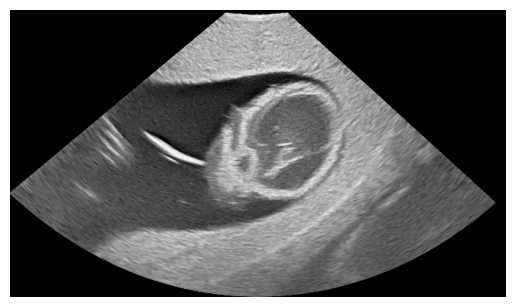

In [5]:
# Read Images
img = mpimg.imread(image_source)
ax = plt.gca()
# Output Images

plt.rcParams['font.size'] = '16'
plt.axis('off')
plt.imshow(img)

672


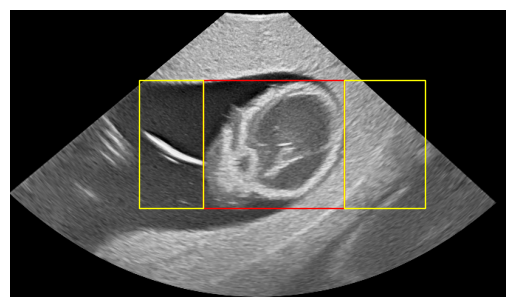

In [6]:
# Read Images
img = mpimg.imread(image_source)
ax = plt.gca()
# Output Images

plt.rcParams['font.size'] = '16'
plt.axis('off')
plt.imshow(img)

for box in boxes:
    xbr = float(box.get('xbr'))
    ybr = float(box.get('ybr'))
    xtl = float(box.get('xtl'))
    ytl = float(box.get('ytl'))
    rect = patchmaker(xbr,xtl,ybr,ytl)
    ax.add_patch(rect)
    if len(boxes) ==1:
        rect = patchmaker(2*xtl/3,xtl,ybr,ytl,edgecolor_ = 'Yellow')
        ax.add_patch(rect)

        img1 = img[int(ytl):int(ybr), int(2*xtl/3):int(xtl),:]
        plt.imshow(img)
        rect = patchmaker(xbr,(img.shape[1]+xbr)/2,ybr,ytl,edgecolor_ = 'Yellow')
        img2 = img[int(ytl):int(ybr), int(xbr):int((img.shape[1]+xbr)/2),:]
        ax.add_patch(rect)
    
plt.savefig('arm_abdomen.pdf', bbox_inches = 'tight') 

print(img.shape[1])

# Save Cropped Images in Loop

/kaggle/input/source-fpus23/Dataset/four_poses/stream_huvb_aroundhead_v/frame_000277.png


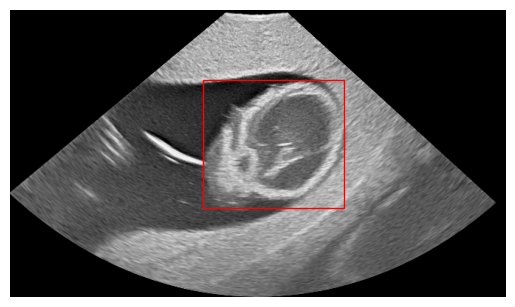

In [7]:
subdirs = [x[0] for x in os.walk(annotation_box_dir)]
#print(subdirs[1:])

for sub_dir in subdirs[1:]:
    plane = sub_dir.split("/")[-1]
    with open(sub_dir + '/annotations.xml', 'r') as f:
        data = f.read()

        Bs_data = BeautifulSoup(data, "xml")
        b_image = Bs_data.find_all('image')

        for image_index in range(len(b_image)):
            boxes = b_image[image_index].find_all('box')
            if len(boxes) == 1:
                image_source = image_source_dir + '/'+ plane + '/' + b_image[image_index].get('name')
                print(image_source)
                img = mpimg.imread(image_source)
                plt.rcParams['font.size'] = '16'
                plt.axis('off')
                ax = plt.gca()
                plt.imshow(img)
                for box in boxes:
                    xbr = float(box.get('xbr'))
                    ybr = float(box.get('ybr'))
                    xtl = float(box.get('xtl'))
                    ytl = float(box.get('ytl'))
                    rect = patchmaker(xbr,xtl,ybr,ytl)
                    ax.add_patch(rect)
                break

        break
        

## Information from foldernames
### hdvb is the Pose
### abdomen is the View_fetus
### h is probe orientation .. h means non-invasive and v means invasive
### [head up (hu) or down (hd), view front (vf) or back (vb)]

In [8]:
splitted_foldername = sub_dir.split("_")
fetus_orientation = splitted_foldername[1]
print(fetus_orientation)

head_up = 0
if fetus_orientation[:2] =='hu':
    head_up=1
front_view = 0
if fetus_orientation[2:] =='vf':
    front_view=1
    
print('Head Up:',head_up,'Front View:',front_view)
print(splitted_foldername[3])

huvb
Head Up: 1 Front View: 0
v


## Location of Ultrasound

In [9]:
if splitted_foldername[2] =='aroundabd':
    location_organ = 0
if splitted_foldername[2] =='aroundsbd': #There was a wrong folder name 'aroundsbd'
    location_organ = 0
    
if splitted_foldername[2] =='longrec':
    location_organ = 1
if splitted_foldername[2] =='aroundhead':
    location_organ = 2
if splitted_foldername[2] =='aroundarms':
    location_organ = 3
if splitted_foldername[2] =='aroundlegs':
    location_organ = 4
    
print('Location of Scanning:',location_organ)

Location of Scanning: 2


## Function for extracting information from name

In [10]:
def parameters_from_name(sub_dir):
    splitted_foldername = sub_dir.split("_")
    fetus_orientation = splitted_foldername[1]
    
    head_up = 0
    if fetus_orientation[:2] =='hu':
        head_up=1
    front_view = 0
    if fetus_orientation[2:] =='vf':
        front_view=1
        
    if splitted_foldername[2] =='aroundabd':
        location_organ = 0
    if splitted_foldername[2] =='aroundsbd': #There was a wrong folder name 'aroundsbd'
        location_organ = 0

    if splitted_foldername[2] =='longrec':
        location_organ = 1
    if splitted_foldername[2] =='aroundhead':
        location_organ = 2
    if splitted_foldername[2] =='aroundarms':
        location_organ = 3
    if splitted_foldername[2] =='aroundlegs':
        location_organ = 4
        
    invasive=1
    if splitted_foldername[3] =='h':
        invasive=0
        
    return head_up, front_view, location_organ, invasive

## Getting names of Image Directories

In [11]:
Sub_directories = []

for iter1 in range(len(subdirs)-1):
    Sub_directories.append(subdirs[iter1+1][len(subdirs[0]):])
    
print('Number of annotations:',len(Sub_directories), '\nDirectory Name:',Sub_directories[5], 
      '\nParameter:',parameters_from_name(Sub_directories[5]))

Number of annotations: 39 
Directory Name: /stream_huvf_longrec_h 
Parameter: (1, 1, 1, 0)


In [12]:
head_up_all = []
front_view_all = []
location_organ_all = []
invasive_all = []

for names_dir in Sub_directories:
    parameters = parameters_from_name(names_dir)
    head_up_all.append(parameters[0])
    front_view_all.append(parameters[1])
    location_organ_all.append(parameters[2])
    invasive_all.append(parameters[3])

## According to statistical values, the data is uniformly distributed

0.48717948717948717
0.5128205128205128
0.48717948717948717


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


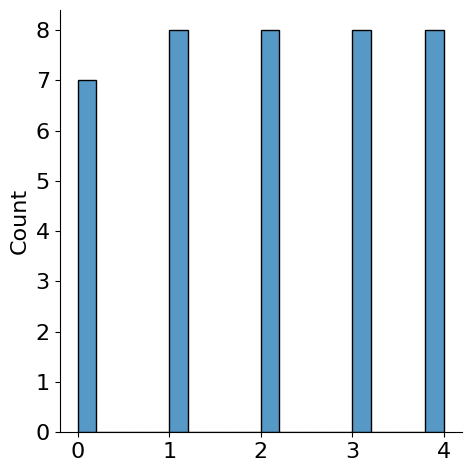

In [13]:
print(np.sum(head_up_all)/len(head_up_all))
print(np.sum(front_view_all)/len(front_view_all))
print(np.sum(invasive_all)/len(invasive_all))

import seaborn as sns
sns.displot(location_organ_all,bins=20) 

## Write a CSV file

In [14]:
import csv

split_variable = 0

with open('Image_labels.csv', 'w', newline='') as csvfile, open('train_labels.csv', 'w', newline='') as trainfile, open('val_labels.csv', 'w', newline='') as valfile, open('test_labels.csv', 'w', newline='') as testfile:
    
    fieldnames = ['Directory','Image Name','Number of Labels','Labels']
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer_train = csv.DictWriter(trainfile, fieldnames=fieldnames)
    writer_val = csv.DictWriter(valfile, fieldnames=fieldnames)
    writer_test = csv.DictWriter(testfile, fieldnames=fieldnames)

    writer.writeheader()
    for sub_dirs in Sub_directories:
        
        with open(annotation_box_dir + sub_dirs + '/annotations.xml', 'r') as f:
            data = f.read()

        Bs_data = BeautifulSoup(data, "xml")
        b_image = Bs_data.find_all('image')

        print('Folder Name:',sub_dirs,'Number of image annotation:',len(b_image))
        for iter2 in range(len(b_image)):
            boxes = b_image[iter2].find_all('box')
            row_all = {'Directory': sub_dirs,'Image Name': b_image[iter2].get('name'),
                             'Number of Labels': str(len(boxes)),'Labels':str(labels_on_image(b_image[iter2]))}
            
            writer.writerow(row_all)
            split_variable = split_variable +1
            if split_variable%5 <3:
                writer_train.writerow(row_all)
            if split_variable%5 == 3:
                writer_val.writerow(row_all)
            if split_variable%5 == 4:
                writer_test.writerow(row_all)
                


Folder Name: /stream_huvb_aroundhead_v Number of image annotation: 305
Folder Name: /stream_huvb_longrec_h Number of image annotation: 597
Folder Name: /stream_huvf_aroundabd_h Number of image annotation: 394
Folder Name: /stream_hdvf_longrec_v Number of image annotation: 339
Folder Name: /stream_hdvb_longrec_h Number of image annotation: 378
Folder Name: /stream_huvf_longrec_h Number of image annotation: 1083
Folder Name: /stream_hdvb_aroundarms_h Number of image annotation: 312
Folder Name: /stream_hdvb_aroundabd_h Number of image annotation: 361
Folder Name: /stream_huvb_aroundarms_h Number of image annotation: 224
Folder Name: /stream_hdvf_aroundlegs_h Number of image annotation: 285
Folder Name: /stream_huvb_longrec_v Number of image annotation: 892
Folder Name: /stream_hdvf_longrec_h Number of image annotation: 556
Folder Name: /stream_hdvf_aroundarms_v Number of image annotation: 206
Folder Name: /stream_huvf_aroundarms_v Number of image annotation: 308
Folder Name: /stream_huvf